# Extract npz files and generate plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from FlexibleWM import *

import time
from datetime import datetime
import ipdb


In [2]:
# Start the timer
start_time = time.time()

# Set the current time as 'name_simu' (e.g., formatted as Year-Month-Day_Hour-Minute-Second)
time_simu = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
print(f"Simulation start time: {time_simu}")

# sim_name = 'trials/{time_simu}'
sim_name = 'FindTuningCurve_rcn_2load'

folder_path = f'./FlexibleWM/{sim_name}'

# num of sims = Number_of_trials * num_stimuli_gird ** number_of_specific_load
dictionnary={
    'name_simu':f'FlexibleWM/{sim_name}',
    'Number_of_trials':5,
    'num_stimuli_gird':13,
    'num_cores':6,
    'same_network_to_use':True,
    'number_of_specific_load':2,
    'N_sensory':512,
    'N_random':1024
    } # Add here any parameter you want to change from default. Defaults values are at the beginning of FlexibleWM.py

Simulation start time: 2024-10-09_09-56-59


In [3]:
MyModel = FlexibleWM(dictionnary)
MyModel.find_tuning_curve()
# gcPython.collect() 

# End the timer
end_time = time.time()

# Calculate the total running time
total_time = end_time - start_time
print(f"Total running time: {total_time:.2f} seconds")

Outer Loop (trials):   0%|          | 0/5 [00:00<?, ?it/s]

Inner Loop (stimuli): 100%|██████████| 169/169 [11:10<00:00,  3.97s/it]


All results saved in the folder
Total running time: 675.57 seconds


  cmap = plt.cm.get_cmap('hsv', rn_len)  # HSV colormap with 512 distinct colors

  axs[0].legend()



psth_rn (5, 13, 13, 2, 512)
psth_rcn (5, 13, 13, 1024)
firing_rate_rn (13, 13, 2, 512)
firing_rate_rcn (13, 13, 1024)


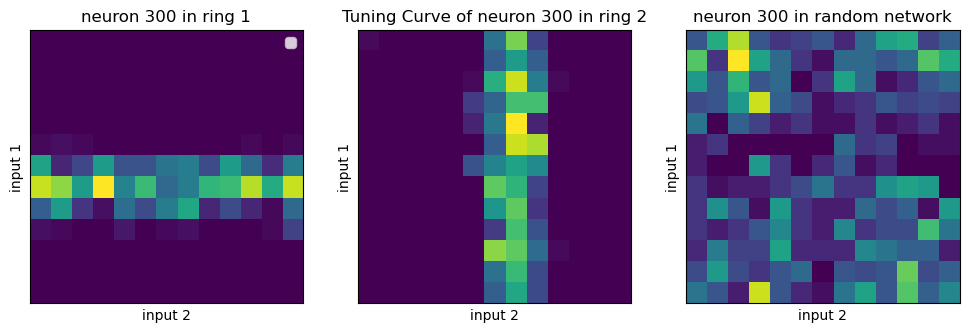

In [4]:
npzfile = np.load(f'{folder_path}/simulation_psth.npz')
psth_rn = npzfile['psth_rn']
psth_rcn = npzfile['psth_rcn']
stimuli_grid = npzfile['stimuli_grid']
npzfile.close()

rn_len = psth_rn.shape[-1]
rcn_len = psth_rcn.shape[-1]

print('psth_rn', psth_rn.shape)
print('psth_rcn', psth_rcn.shape)
firing_rate_rn = np.average(psth_rn, axis=0) / 0.1  # Average over trials. Spike counts / 100ms
firing_rate_rcn = np.average(psth_rcn, axis=0) / 0.1  # Average over trials. Spike counts / 100ms
print('firing_rate_rn', firing_rate_rn.shape)
print('firing_rate_rcn', firing_rate_rcn.shape)

# # Example plot with overlayed lines colored by their index
# neuron_indices_rn = np.linspace(0,rn_len-1,num=1,dtype=int32) # Example indices for lines to plot
# neuron_indices_rcn = np.linspace(0,rcn_len-1,num=1,dtype=int32) # Example indices for lines to plot

# print('neuron_indices_rn',neuron_indices_rn)
# print('neuron_indices_rcn',neuron_indices_rcn)

color_axis = (stimuli_grid / rn_len - 0.5) * 2 * np.pi

# Create figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# First subplot: Tuning curves plot
cmap = plt.cm.get_cmap('hsv', rn_len)  # HSV colormap with 512 distinct colors
    # color = cmap(idx / rn_len)  # Normalize index to [0,1] and get color


idx=300

axs[0].imshow(firing_rate_rn[:,:,0, idx])
axs[1].imshow(firing_rate_rn[:,:,1, idx])
axs[2].imshow(firing_rate_rcn[:,:, idx])


axs[0].set_title(f'neuron {idx} in ring 1')
axs[0].set_ylabel('input 1')
axs[0].set_xlabel('input 2')
axs[0].set_xticks([])
axs[0].set_yticks([])
# axs[0].set_xticklabels([r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
# axs[0].grid(True)
axs[0].legend()

axs[1].set_title(f'Tuning Curve of neuron {idx} in ring 2')
# axs[1].set_xlabel('Stimuli (colors)')
axs[1].set_ylabel('input 1')
axs[1].set_xlabel('input 2')
axs[1].set_xticks([])
axs[1].set_yticks([])
# axs[1].set_xticklabels([r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])

axs[2].set_title(f'neuron {idx} in random network')
# axs[1].set_xlabel('Stimuli (colors)')
axs[2].set_ylabel('input 1')
axs[2].set_xlabel('input 2')
axs[2].set_xticks([])
axs[2].set_yticks([])

plt.show()

centered plot: method 1 = average over other axis

  axs[0].legend()



psth_rn (5, 13, 13, 2, 512)
psth_rcn (5, 13, 13, 1024)
firing_rate_rn (13, 13, 512)
firing_rate_rcn (13, 13, 1024)


[]

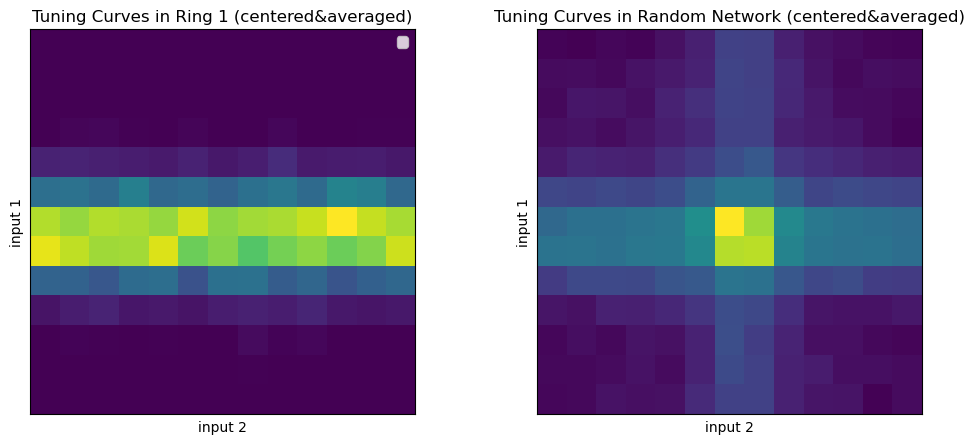

In [8]:
# Load the Matrix_tuning.npz file
npzfile = np.load(f'{folder_path}/simulation_psth.npz')
psth_rn = npzfile['psth_rn']
psth_rcn = npzfile['psth_rcn']
stimuli_grid = npzfile['stimuli_grid']
npzfile.close()

rn_len = psth_rn.shape[-1]
rcn_len = psth_rcn.shape[-1]

print('psth_rn', psth_rn.shape)
print('psth_rcn', psth_rcn.shape)
# firing_rate_rn = np.average(psth_rn, axis=(0,2))[:,0] / 0.1  # (2, 3, 3, 2, 512) Average over trials amd all other stimuli dimensions. Take the response of the first net Spike counts / 100ms
# firing_rate_rcn = np.average(psth_rcn, axis=(0,1)) / 0.1  # Average over trials. Spike counts / 100ms

firing_rate_rn = np.average(psth_rn, axis=0)[:,:,0] / 0.1  # Average over trials. Spike counts / 100ms
firing_rate_rcn = np.average(psth_rcn, axis=0) / 0.1  # Average over trials. Spike counts / 100ms


print('firing_rate_rn', firing_rate_rn.shape)
print('firing_rate_rcn', firing_rate_rcn.shape)


# Initialize an empty array to store the shifted matrix
centered_firing_rate_rn = np.zeros_like(firing_rate_rn)
centered_firing_rate_rcn = np.zeros_like(firing_rate_rcn)

# find preferred-color centered tunng curve
for neuron_position in range(firing_rate_rn.shape[-1]):
    # ipdb.set_trace()
    preferred_color_index = min(range(len(stimuli_grid)), key=lambda i: abs(stimuli_grid[i] - neuron_position))
    # print(preferred_color_index)
    shift = int(-preferred_color_index+len(stimuli_grid)/2)
    centered_firing_rate_rn[:,:,neuron_position] = np.roll(firing_rate_rn[:,:,neuron_position], shift, axis=0)

ave_centered_firing_rate_rn =  np.average(centered_firing_rate_rn, axis=2)


# preferred_color_index_ax1 = stimuli_grid[np.argmax(firing_rate_rcn,axis=0)]/rn_len
# preferred_color_index_ax2 = stimuli_grid[np.argmax(firing_rate_rcn,axis=1)]/rn_len
# print(preferred_color_index_ax1.shape)
for neuron_position in range(firing_rate_rcn.shape[-1]):
    # Find the index of the maximum value
    max_index_flat = np.argmax(firing_rate_rcn[:,:,neuron_position])
    max_index_2d = np.array(np.unravel_index(max_index_flat, firing_rate_rcn[:,:,neuron_position].shape))
    shift_2d = (-max_index_2d+len(stimuli_grid)/2).astype(int)
    temp = np.roll(firing_rate_rcn[:,:,neuron_position], shift_2d[0],axis=0)
    centered_firing_rate_rcn[:,:,neuron_position] = np.roll(temp, shift_2d[1],axis=1)



    # plt.figure()
    # plt.imshow(firing_rate_rcn[:,:,neuron_position])
    # print(max_index_2d)
    # print(shift_2d)
    # plt.figure()
    # plt.imshow(centered_firing_rate_rcn[:,:,neuron_position])
    # error
ave_centered_firing_rate_rcn =  np.average(centered_firing_rate_rcn, axis=2)


# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].imshow(ave_centered_firing_rate_rn)
axs[1].imshow(ave_centered_firing_rate_rcn)


axs[0].set_title(f'Tuning Curves in Ring 1 (centered&averaged)')
axs[0].set_ylabel('input 1')
axs[0].set_xlabel('input 2')
axs[0].set_xticks([])
axs[0].set_yticks([])
# axs[0].set_xticklabels([r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
# axs[0].grid(True)
axs[0].legend()

axs[1].set_title(f'Tuning Curves in Random Network (centered&averaged)')
# axs[1].set_xlabel('Stimuli (colors)')
axs[1].set_ylabel('input 1')
axs[1].set_xlabel('input 2')
axs[1].set_xticks([])
axs[1].set_yticks([])

# print(centered_firing_rate_rcn.shape)
# ave_centered_firing_rate_rn = np.average(centered_firing_rate_rn,axis=1)
# ave_centered_firing_rate_rcn = np.average(centered_firing_rate_rcn,axis=1)
# # Create figure and subplots
# fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# # First subplot: Tuning curves plot
# cmap = plt.cm.get_cmap('hsv', rn_len)  # HSV colormap with 512 distinct colors
# axs[0].plot(color_axis, ave_centered_firing_rate_rn)
# axs[1].plot(color_axis, ave_centered_firing_rate_rcn)

# # Set titles, labels, limits, and grids
# axs[0].set_title('Tuning Curves in Recurrent Network (centered&averaged)')
# # axs[0].set_xlabel('Stimuli (colors)')
# axs[0].set_ylabel('Firing Rate (Hz)')
# axs[0].set_xlim([-np.pi, np.pi])  # Ensure the x-axis spans from -pi to pi
# axs[0].set_ylim([0, 80])
# axs[0].set_xticks([])
# # axs[0].set_xticklabels([r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
# axs[0].grid(True)
# axs[0].legend()

# axs[1].set_title('Tuning Curves in Random Connected Network (centered&averaged)')
# # axs[1].set_xlabel('Stimuli (colors)')
# axs[1].set_ylabel('Firing Rate (Hz)')
# axs[1].set_xlim([-np.pi, np.pi])  # Ensure the x-axis spans from -pi to pi
# axs[1].set_ylim([0, 80])
# axs[1].set_xticks([])
# # axs[1].set_xticklabels([r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
# axs[1].grid(True)
# axs[1].legend()

# # Create a scalar mappable for the color bar (showing colors from -pi to pi)
# norm = mpl.colors.Normalize(vmin=-np.pi, vmax=np.pi)
# sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])

# # Add two identical colorbars beneath the plots
# cbar_ax1 = fig.add_axes([0.0612, 0.17, 0.433, 0.015])  # Position for colorbar 1
# cbar_ax2 = fig.add_axes([0.5535, 0.17, 0.433, 0.015])  # Position for colorbar 2

# # Create the colorbars
# cbar1 = plt.colorbar(sm, cax=cbar_ax1, orientation='horizontal')
# cbar2 = plt.colorbar(sm, cax=cbar_ax2, orientation='horizontal')

# # Set colorbar labels
# cbar1.set_label(r'Stimuli')
# cbar2.set_label(r'Stimuli')
# cbar1.set_ticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
# cbar1.set_ticklabels([r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
# cbar2.set_ticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
# cbar2.set_ticklabels([r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
# # Adjust layout for better spacing

# # fig.text(0.1,0.05,'color of tuning curve indicates prefered/selective color of the neuron')

# plt.tight_layout(rect=[0, 0.15, 1, 1])  # Leave space at the bottom for colorbars
# # Show the figure
# plt.show()

centered plot: method 2 = fix another stimuli

psth_rn (5, 13, 13, 2, 512)
psth_rcn (5, 13, 13, 1024)
firing_rate_rn (13, 512)
firing_rate_rcn (13, 1024)


  cmap = plt.cm.get_cmap('hsv', rn_len)  # HSV colormap with 512 distinct colors

  axs[0].legend()

  axs[1].legend()

  plt.tight_layout(rect=[0, 0.15, 1, 1])  # Leave space at the bottom for colorbars



(13, 1024)


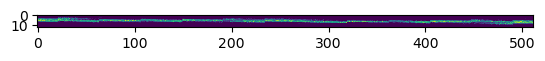

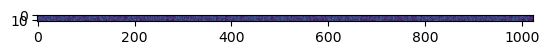

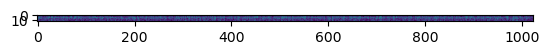

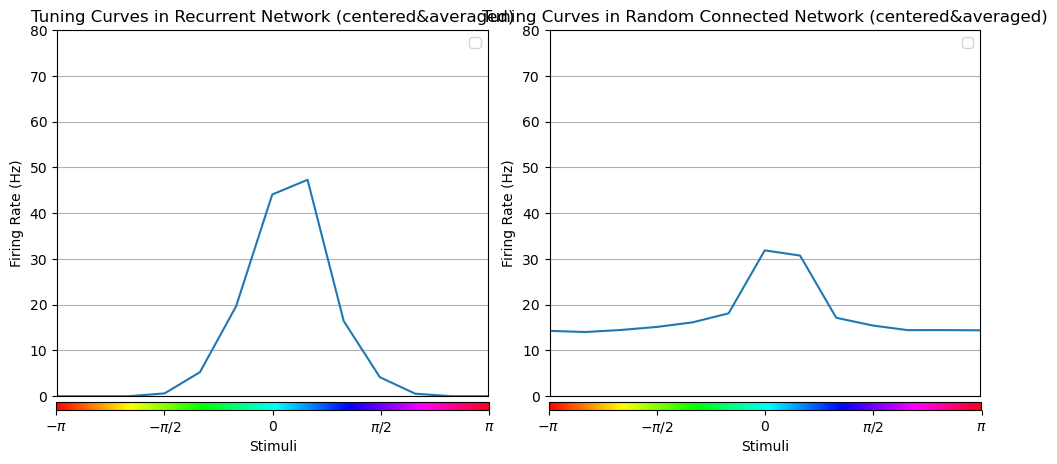

In [6]:
# Load the Matrix_tuning.npz file
npzfile = np.load(f'{folder_path}/simulation_psth.npz')
psth_rn = npzfile['psth_rn']
psth_rcn = npzfile['psth_rcn']
stimuli_grid = npzfile['stimuli_grid']
npzfile.close()

rn_len = psth_rn.shape[-1]
rcn_len = psth_rcn.shape[-1]

print('psth_rn', psth_rn.shape)
print('psth_rcn', psth_rcn.shape)
firing_rate_rn = np.average(psth_rn, axis=(0))[:,1,0] / 0.1  # (2, 3, 3, 2, 512) Average over trials amd all other stimuli dimensions. Take the response of the first net Spike counts / 100ms
firing_rate_rcn = np.average(psth_rcn, axis=(0))[:,1] / 0.1  # Average over trials. Spike counts / 100ms
print('firing_rate_rn', firing_rate_rn.shape)
print('firing_rate_rcn', firing_rate_rcn.shape)


# Initialize an empty array to store the shifted matrix
firing_rate_rn = firing_rate_rn
centered_firing_rate_rn = np.zeros_like(firing_rate_rn)
centered_firing_rate_rcn = np.zeros_like(firing_rate_rcn)

# find preferred-color centered tunng curve
for neuron_position in range(firing_rate_rn.shape[-1]):
    # ipdb.set_trace()
    preferred_color_index = min(range(len(stimuli_grid)), key=lambda i: abs(stimuli_grid[i] - neuron_position))
    # print(preferred_color_index)
    shift = int(-preferred_color_index+len(stimuli_grid)/2)
    centered_firing_rate_rn[:,neuron_position] = np.roll(firing_rate_rn[:,neuron_position], shift)
plt.figure()
plt.imshow(centered_firing_rate_rn)

preferred_color_index = stimuli_grid[np.argmax(firing_rate_rcn,axis=0)]/rn_len
for neuron_position in range(firing_rate_rcn.shape[1]):
    preferred_color_index=np.argmax(firing_rate_rcn[:,neuron_position])
    shift = int(-preferred_color_index+len(stimuli_grid)/2)
    centered_firing_rate_rcn[:,neuron_position] = np.roll(firing_rate_rcn[:,neuron_position], shift)
plt.figure()
plt.imshow(firing_rate_rcn)
plt.figure()
plt.imshow(centered_firing_rate_rcn)

print(centered_firing_rate_rcn.shape)
ave_centered_firing_rate_rn = np.average(centered_firing_rate_rn,axis=1)
ave_centered_firing_rate_rcn = np.average(centered_firing_rate_rcn,axis=1)
# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# First subplot: Tuning curves plot
cmap = plt.cm.get_cmap('hsv', rn_len)  # HSV colormap with 512 distinct colors
axs[0].plot(color_axis, ave_centered_firing_rate_rn)
axs[1].plot(color_axis, ave_centered_firing_rate_rcn)

# Set titles, labels, limits, and grids
axs[0].set_title('Tuning Curves in Recurrent Network (centered&averaged)')
# axs[0].set_xlabel('Stimuli (colors)')
axs[0].set_ylabel('Firing Rate (Hz)')
axs[0].set_xlim([-np.pi, np.pi])  # Ensure the x-axis spans from -pi to pi
axs[0].set_ylim([0, 80])
axs[0].set_xticks([])
# axs[0].set_xticklabels([r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
axs[0].grid(True)
axs[0].legend()

axs[1].set_title('Tuning Curves in Random Connected Network (centered&averaged)')
# axs[1].set_xlabel('Stimuli (colors)')
axs[1].set_ylabel('Firing Rate (Hz)')
axs[1].set_xlim([-np.pi, np.pi])  # Ensure the x-axis spans from -pi to pi
axs[1].set_ylim([0, 80])
axs[1].set_xticks([])
# axs[1].set_xticklabels([r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
axs[1].grid(True)
axs[1].legend()

# Create a scalar mappable for the color bar (showing colors from -pi to pi)
norm = mpl.colors.Normalize(vmin=-np.pi, vmax=np.pi)
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Add two identical colorbars beneath the plots
cbar_ax1 = fig.add_axes([0.0612, 0.17, 0.433, 0.015])  # Position for colorbar 1
cbar_ax2 = fig.add_axes([0.5535, 0.17, 0.433, 0.015])  # Position for colorbar 2

# Create the colorbars
cbar1 = plt.colorbar(sm, cax=cbar_ax1, orientation='horizontal')
cbar2 = plt.colorbar(sm, cax=cbar_ax2, orientation='horizontal')

# Set colorbar labels
cbar1.set_label(r'Stimuli')
cbar2.set_label(r'Stimuli')
cbar1.set_ticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
cbar1.set_ticklabels([r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
cbar2.set_ticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
cbar2.set_ticklabels([r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
# Adjust layout for better spacing

# fig.text(0.1,0.05,'color of tuning curve indicates prefered/selective color of the neuron')

plt.tight_layout(rect=[0, 0.15, 1, 1])  # Leave space at the bottom for colorbars
# Show the figure
plt.show()